In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tsfresh import extract_features, extract_relevant_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_selection.relevance import calculate_relevance_table

In [2]:
with open('./gesamt.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
trials = ["R1", "R2", "R3", "R4", "R5", "R6"]
X = data.drop(["label"], axis=1)
X = X.reset_index()
X['trial'] = X['IDs'].str[:2]
# y = [data.loc[data["IDs"] == id]["label"][0] for id in data["IDs"].unique()]
y = data.iloc[::203, :]["label"]
y.index = data.iloc[::203, :]["IDs"]

In [4]:
input_data = [X[X["trial"] == trial].drop("trial", axis=1) for trial in trials]
target_labels = [y[y.index.str[:2] == trial] for trial in trials]

In [5]:
this_input_data = pd.concat(input_data[i] for i in [0, 1, 2, 4, 5])
this_target_labels = pd.concat(target_labels[i] for i in [0, 1, 2, 4, 5])

In [6]:
this_input_data = pd.concat(input_data[i] for i in [0, 1, 2, 4, 5])
this_target_labels = pd.concat(target_labels[i] for i in [0, 1, 2, 4, 5])

features = extract_features(this_input_data, column_id="IDs", column_sort="date", column_kind=None, column_value=None, n_jobs=12)

Feature Extraction:  40%|████      | 24/60 [07:06<02:12,  3.68s/it]

In [ ]:
impute(features)
relevance_table = calculate_relevance_table(features, this_target_labels, n_jobs=12)
relevance_table = relevance_table[relevance_table.relevant]
relevance_table.sort_values("p_value", inplace=True)

Error: Kernel is dead

In [ ]:
relevance_table

,feature,type,p_value,relevant
feature,,,,


In [12]:
trial = trials[0]
input_data = X.loc[X["IDs"].str.contains(trial)]
relevant_features = tsfresh.extract_relevant_features(input_data, y.loc[y.index.str.contains(trial)], column_id="IDs", column_sort="date", column_kind=None, column_value=None, n_jobs=12)

Feature Extraction: 100%|██████████| 60/60 [04:23<00:00,  4.39s/it]


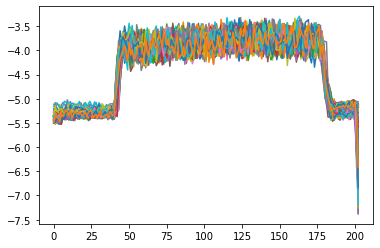

In [39]:
for i, sample in enumerate(data["IDs"].unique()):
    series = data.loc[data["IDs"] == sample]["Strom_Z"]
    plt.plot(np.arange(0, series.shape[0]), series)

    if i > 100:
        break

plt.show()